El archivo 'productos_ingredientes_identificados_v12.json' y 'productos_ingredientes_identificados_v11.csv' han sido generados con éxito.
              ingredients_text ingredientes_identificados  \
0                      Cheddar                   [cheese]   
1  Butter (Milk), Salt (1.5%).             [milk, butter]   
2               Salmon (Fish).                     [fish]   
3         Clementine, Mandarin                   [citrus]   
4                      Avocado                  [avocado]   

  ingredientes_con_porcentaje  
0                          []  
1                          []  
2                          []  
3                          []  
4                          []  
Total de ingredientes identificados: 68
     Ingrediente  Frecuencia
0          sugar       46672
1  sunflower oil       36209
2          bread       25799
3         spices       23406
4          maize       19336
El archivo 'frecuencia_ingredientes.csv' ha sido generado con éxito.


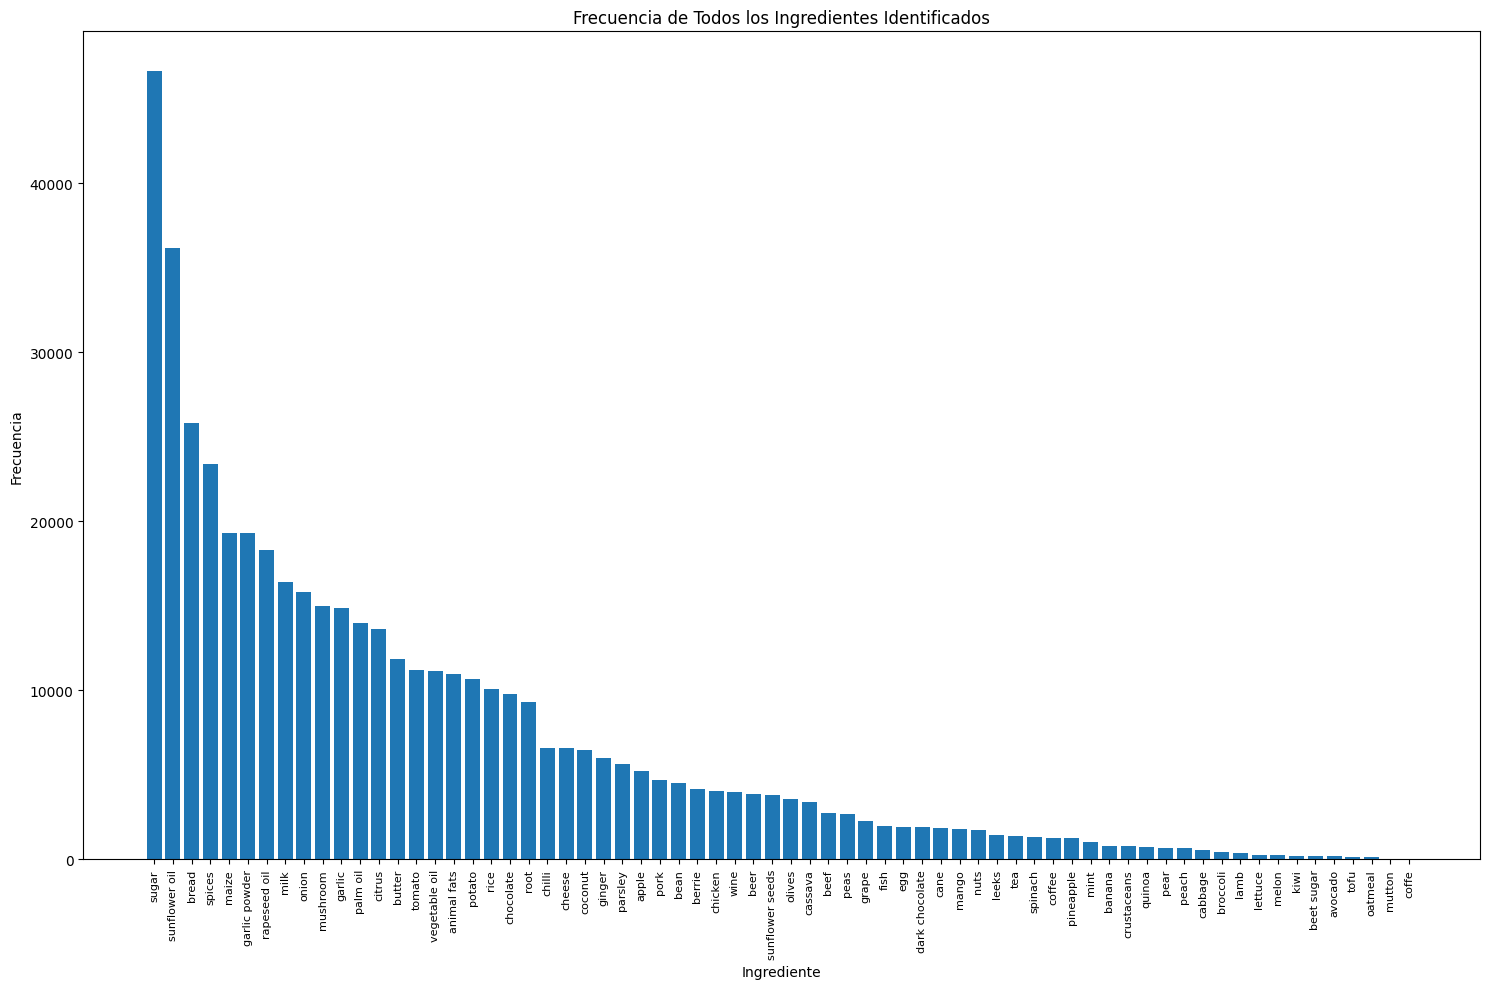

Frecuencia del número de ingredientes por producto:
    Número de Ingredientes  Frecuencia
0                        0       26551
1                        1       11807
2                        2        9170
3                        3        6212
4                        4        5577
5                        5        5236
6                        6        5000
7                        7        4645
8                        8        4312
9                        9        4024
10                      10        3977
11                      11        3919
12                      12        2631
13                      13        2152
14                      14        1582
15                      15        1550
16                      16         854
17                      17         587
18                      18         424
19                      19         310
20                      20         270
21                      21         143
22                      22          84
23          

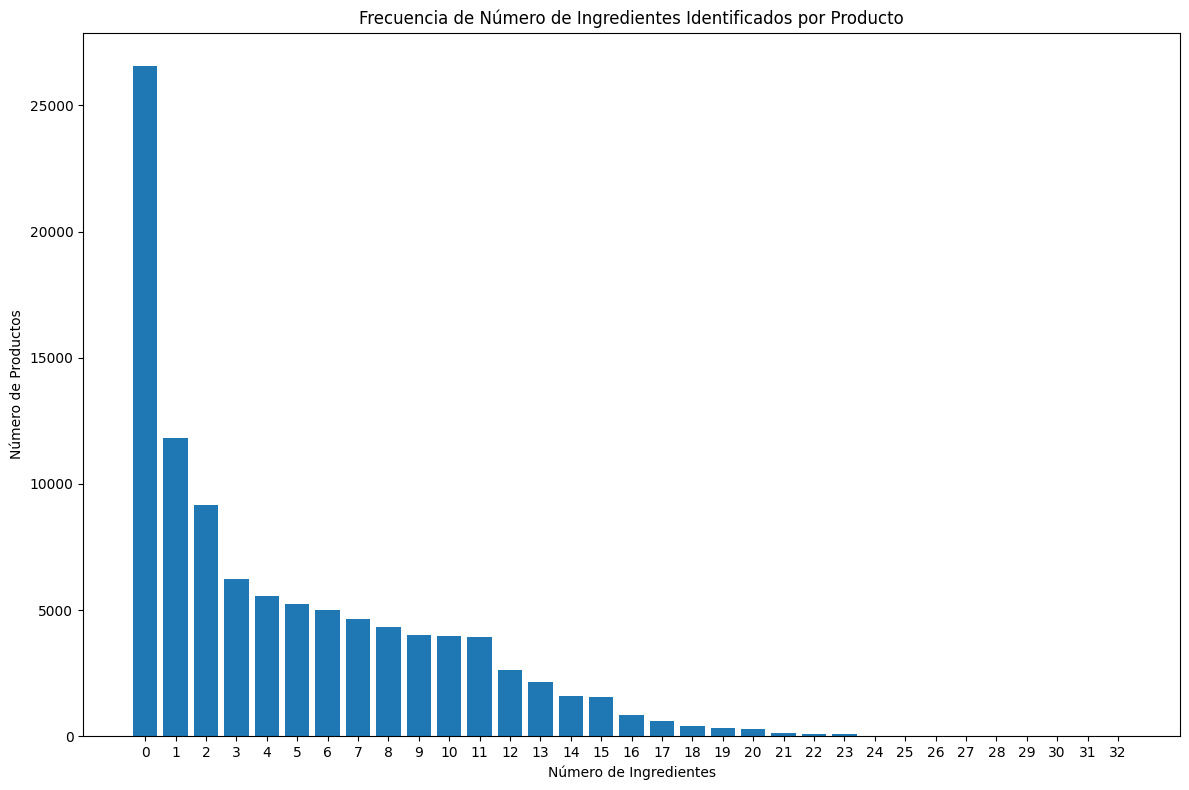

In [10]:
import pandas as pd
import re
import json
import matplotlib.pyplot as plt

# Cargar ingredientes normalizados
ingredientes_totales = pd.read_csv("ingredientes+huella.csv", usecols=["ingredient_normalized"])

# Agregar nuevos ingredientes normalizados adicionales
ingredientes_adicionales = [
    "garlic", "sugar", "spices", "chocolate", "mushroom", "parsley","vegetable oil",
    "coconut", "bean", "pineapple", "mango", "avocado","spinach", "broccoli",
    "ginger", "pear", "lettuce", "melon", "peach", "cabbage", "mint", "quinoa",
    "kiwi","chilli", "garlic powder"
]
ingredientes_totales = pd.concat([
    ingredientes_totales,
    pd.DataFrame({"ingredient_normalized": ingredientes_adicionales})
], ignore_index=True)

# Crear un diccionario de mapeo de sinónimos o ingredientes vinculados
ingredientes_vinculados = {
    "glucose": "sugar",
    "dextrose": "sugar",
    "maltodextrin": "sugar",
    "wheatflour": "bread",
    "flour": "bread",
    "wheatstarch": "bread",
    "cornflour": "maize",
    "cocoa": "chocolate",
    "yeast": "mushroom",
    "black pepper": "spices",
    "cheddar": "cheese",
    "sweeteners": "sugar",
    "orange": "citrus",
    "lemon": "citrus",
    "hop": "beer",
    "pepper": "spices",
    "fat": "animal fats",
    "carrot": "root",
    "yogurt": "milk",
    "yoghurt": "milk",
    "ginger": "root",
    "paprika": "spices",
    "grapefruit": "grape",
    "strawberry": "berrie",
    "barley": "beer",
    "beetroot": "root",
    "lime": "citrus",
    "raspberry": "berrie",
    "corn": "maize",
    "cacao": "chocolate",
    "maltedbarley": "beer",
    "durum": "bread",
    "malt": "beer",
    "skimmedmilk": "milk",
    "cranberry": "berrie",
    "tuna": "fish",
    "sweetcorn": "maize",
    "watermelon": "melon",
    "peppercorn": "spices",
    "turkey": "chicken",
    "mandarin": "citrus",
    "rolledoat": "bread",
    "pomegranate": "berrie",
    "almonds": "nuts",
    "blackberry": "berrie",
    "blueberries": "berrie",
    "duck": "chicken",
    "goose": "chicken",
    "quail": "chicken",
    "oat": "bread",
    "lard": "animal fats",
    "butterfat": "animal fats",
    "tapioca": "cassava",
    "mozzarella": "cheese",
    "brie": "cheese",
    "gouda": "cheese",
    "tangerine": "citrus",
    "espresso": "coffe",
    "shrimp": "crustaceans",
    "crab": "crustaceans",
    "lobster": "crustaceans",
    "prawn": "crustaceans",
    "cod": "fish",
    "trout": "fish",
    "sardine": "fish",
    "walnuts": "nuts",
    "cashew": "nuts",
    "pecans": "nuts",
    "pistachio": "nuts",
    "shallot": "onion",
    "radish": "root",
    "parsnip": "root",
    "fowl": "chicken",
    "partridge": "chicken",
    "mackerel": "fish",
    "haddock": "fish",
    "clove": "spices",
    "halibut": "fish",
    "fructose":"sugar",
    "chillies":"chilli",
    "pasta": "bread"
}

# Cargar productos
file_path = '../data/raw/products_utf8.csv'
productos = pd.read_csv(file_path, usecols=["ingredients_text"], encoding='utf-8')

# Limpiar y estandarizar la lista de ingredientes normalizados
def normalizar_ingrediente(ingrediente):
    ingrediente = ingrediente.lower().strip()
    ingrediente = re.sub(r'[^\w\s]', '', ingrediente)  # Eliminar caracteres especiales
    return ingrediente

ingredientes_set = set(
    ingredientes_totales['ingredient_normalized']
    .dropna()
    .apply(normalizar_ingrediente)
)

# Función para manejar nombres compuestos, plurales y reglas "es"
def singular_plural_compound_match(palabra, ingredientes_set):
    palabra = palabra.lower().strip()  # Asegurarse de manejar mayúsculas/minúsculas
    if palabra in ingredientes_set:
        return palabra
    elif palabra.endswith('s') and palabra[:-1] in ingredientes_set:
        return palabra[:-1]  # Singular
    elif palabra + 's' in ingredientes_set:
        return palabra + 's'  # Plural
    elif palabra.endswith('es') and palabra[:-2] in ingredientes_set:
        return palabra[:-2]  # Reglas "es" (tomatoes -> tomato)
    elif palabra + 'es' in ingredientes_set:
        return palabra + 'es'  # Plural con "es"
    else:
        for ingrediente in ingredientes_set:
            if palabra in ingrediente.split():  # Verificar palabras compuestas
                return ingrediente
    return None

# Función para buscar en ingredientes vinculados
def mapear_a_vinculados(palabra):
    palabra = palabra.lower().strip()
    if palabra in ingredientes_vinculados:
        return ingredientes_vinculados[palabra]
    elif palabra.endswith('s') and palabra[:-1] in ingredientes_vinculados:
        return ingredientes_vinculados[palabra[:-1]]  # Singular
    elif palabra.endswith('es') and palabra[:-2] in ingredientes_vinculados:
        return ingredientes_vinculados[palabra[:-2]]  # Reglas "es"
    return None

# Función para extraer ingredientes con porcentaje y normalizar
def extraer_ingrediente_con_porcentaje(texto):
    matches = re.findall(r'(\w+(?:\s\w+)*)\s*\((\d+\%)\)', texto)
    return [{"ingrediente": normalizar_ingrediente(match[0]), "porcentaje": match[1]} for match in matches]

# Función para buscar ingredientes en el texto ambiguo
def identificar_ingredientes(texto, ingredientes_set):
    if pd.isna(texto):
        return []
    texto = texto.lower()
    texto = re.sub(r'[^\w\s,;:]', '', texto)  # Limpiar caracteres no deseados
    palabras = re.split(r'[ ,;:]', texto)  # Separar por delimitadores

    ingredientes_identificados = []

    for palabra in palabras:
        palabra = palabra.strip()
        # Primero, buscar en los ingredientes normalizados
        normalizado = singular_plural_compound_match(palabra, ingredientes_set)
        if normalizado:
            ingredientes_identificados.append(normalizado)
            continue

        # Luego, buscar en ingredientes vinculados
        vinculado = mapear_a_vinculados(palabra)
        if vinculado:
            ingredientes_identificados.append(vinculado)
            continue

    return list(set(ingredientes_identificados))  # Eliminar duplicados

# Aplicar las funciones a toda la base de datos
productos['ingredientes_identificados'] = productos['ingredients_text'].apply(
    lambda x: identificar_ingredientes(x, ingredientes_set)
)
productos['ingredientes_con_porcentaje'] = productos['ingredients_text'].apply(
    lambda x: extraer_ingrediente_con_porcentaje(x) if isinstance(x, str) else []
)

# Seleccionar columnas relevantes
resultado = productos[['ingredients_text', 'ingredientes_identificados', 'ingredientes_con_porcentaje']]

# Guardar el resultado en un archivo JSON
resultado_json = resultado.to_json(orient='records', indent=2, force_ascii=False)
with open("productos_ingredientes_identificados_v12.json", "w", encoding="utf-8") as file:
    file.write(resultado_json)

# Guardar el resultado en un archivo CSV
resultado.to_csv("productos_ingredientes_identificados_v12.csv", index=False, encoding="utf-8")

# Confirmación y muestra de ejemplo
print("El archivo 'productos_ingredientes_identificados_v12.json' y 'productos_ingredientes_identificados_v11.csv' han sido generados con éxito.")
print(resultado.head())

# Cargar el archivo JSON generado previamente
with open("productos_ingredientes_identificados_v12.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Convertir a un DataFrame
df = pd.DataFrame(data)

# Aplanar la lista de ingredientes identificados en una sola lista
ingredientes_lista = df['ingredientes_identificados'].explode()

# Calcular las frecuencias de cada ingrediente
frecuencias = ingredientes_lista.value_counts().reset_index()
frecuencias.columns = ['Ingrediente', 'Frecuencia']

# Mostrar el número total de ingredientes identificados y una muestra
print(f"Total de ingredientes identificados: {frecuencias.shape[0]}")
print(frecuencias.head())

# Guardar las frecuencias en un archivo CSV
frecuencias.to_csv("frecuencia_ingredientes.csv", index=False)
print("El archivo 'frecuencia_ingredientes.csv' ha sido generado con éxito.")

# Crear un diagrama de barras con todas las frecuencias
plt.figure(figsize=(15, 10))
plt.bar(frecuencias['Ingrediente'], frecuencias['Frecuencia'])
plt.xticks(rotation=90, fontsize=8)
plt.title("Frecuencia de Todos los Ingredientes Identificados")
plt.xlabel("Ingrediente")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Calcular el número de ingredientes identificados por producto
df['num_ingredientes'] = df['ingredientes_identificados'].apply(lambda x: len(x))

# Calcular las frecuencias del número de ingredientes
frecuencia_productos = df['num_ingredientes'].value_counts().reset_index()
frecuencia_productos.columns = ['Número de Ingredientes', 'Frecuencia']
frecuencia_productos = frecuencia_productos.sort_values(by='Número de Ingredientes')

# Mostrar la tabla de frecuencias
print("Frecuencia del número de ingredientes por producto:")
print(frecuencia_productos)

# Guardar las frecuencias en un archivo CSV
frecuencia_productos.to_csv("frecuencia_ingredientes_por_producto.csv", index=False)
print("El archivo 'frecuencia_ingredientes_por_producto.csv' ha sido generado con éxito.")

# Crear un diagrama de barras
plt.figure(figsize=(12, 8))
plt.bar(frecuencia_productos['Número de Ingredientes'], frecuencia_productos['Frecuencia'])
plt.title("Frecuencia de Número de Ingredientes Identificados por Producto")
plt.xlabel("Número de Ingredientes")
plt.ylabel("Número de Productos")
plt.xticks(frecuencia_productos['Número de Ingredientes'])
plt.tight_layout()
plt.show()
